data4/프로야구.csv 를 이용하여 아래를 작성하시요.

target: 2018년 연봉 
나머지:feature(선수명은 제거)

1) SGDRegress 모델의 r2 점수(train, test )를 출력하시요.

2) 
heatmap을그리고
다중공선성 컬럼을 확인하고
다중공선성이 높은 컬럼을 제거후
SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

3) Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

4, 5, 6 번  은 문제를 만들어서 데이터를 분석하시요 ( 예를 들어 연봉이 가장높은 top 5 선수명 연봉등)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_boston, load_iris

from sklearn.linear_model import Ridge,Lasso,ElasticNet, LinearRegression,  SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

import mglearn
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

import warnings
warnings.simplefilter('ignore')

In [2]:
baseball_df = pd.read_csv('data4/프로야구.csv')
baseball_df

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000
3,차우찬,LG,10,7,0,0,0,28,28,175.2,...,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000
4,레일리,롯데,13,7,0,0,0,30,30,187.1,...,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,장민재,한화,2,5,0,0,2,33,5,62.2,...,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100
148,정용운,KIA,3,2,0,0,0,25,11,59.1,...,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100
149,노경은,롯데,0,2,0,0,0,9,2,14.2,...,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000
150,김승현,삼성,0,3,0,1,0,41,0,43.2,...,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900


In [3]:
baseball_df = baseball_df.drop(['선수명'], axis=1)

In [4]:
x_data = baseball_df.drop('연봉(2018)', axis=1)
y_data = baseball_df.iloc[:, [-2]]

In [5]:
x_data

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,SK,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,85000
1,LG,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,50000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,150000
3,LG,10,7,0,0,0,28,28,175.2,8.04,1.95,1.02,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,2.11,0.91,0.323,74.1,3.80,6.13,4.36,4.31,4.38,85000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,3.30,1.58,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,8100
148,KIA,3,2,0,0,0,25,11,59.1,4.85,5.61,1.06,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,3100
149,롯데,0,2,0,0,0,9,2,14.2,4.91,4.91,2.45,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,16000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,7.01,1.44,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,2900


In [6]:
y_data

,연봉(2018)
0,140000
1,120000
2,230000
3,100000
4,111000
...,...
147,7100
148,7500
149,10000
150,4000


In [7]:
# train, test 분리
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, 
                                test_size=0.2,random_state=1)

In [8]:
x_train

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
19,롯데,1,3,37,0,5,61,0,62.0,9.00,1.60,1.02,0.311,89.9,2.18,3.91,3.69,3.37,1.82,70000
113,SK,2,2,0,3,1,21,6,41.1,7.40,4.14,1.74,0.379,68.2,6.53,0.07,6.13,6.09,-0.06,2800
103,두산,0,0,0,0,0,1,0,1.0,0.00,9.00,0.00,0.000,100.0,0.00,0.04,6.73,7.64,-0.01,2700
77,SK,5,3,7,16,4,61,0,68.0,6.49,4.37,1.19,0.258,76.2,3.57,2.59,5.34,5.39,0.13,8000
145,삼성,2,0,0,0,0,30,0,31.2,7.11,6.25,2.56,0.276,81.9,5.12,0.31,8.03,8.03,-0.44,6200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,KIA,7,4,11,6,6,65,1,80.1,7.39,5.27,1.12,0.267,75.0,4.59,1.89,5.54,5.53,-0.20,4700
137,롯데,3,1,0,2,1,24,0,26.2,3.71,2.70,1.69,0.307,71.4,5.40,0.19,6.47,6.83,-0.24,15000
72,KT,0,2,0,0,0,4,3,11.1,6.35,4.76,0.00,0.400,50.0,9.53,-0.13,4.44,4.67,0.18,3000
140,KT,0,2,0,1,0,37,1,39.0,5.08,3.92,1.62,0.294,68.3,6.23,0.25,6.40,6.63,-0.28,6300


In [9]:
y_train

,연봉(2018)
19,70000
113,4000
103,2700
77,14000
145,7000
...,...
133,15000
137,10000
72,3100
140,6800


In [10]:
x_test

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
59,삼성,1,2,0,1,1,45,0,56.0,8.84,2.25,1.77,0.324,72.1,5.14,1.16,5.29,5.05,0.28,10500
33,한화,8,7,0,2,0,36,18,119.0,7.03,3.33,1.44,0.328,72.1,5.22,2.23,5.46,5.42,1.09,18000
69,삼성,0,2,0,0,0,11,6,25.0,8.28,7.92,0.72,0.351,64.3,6.48,-0.16,5.69,5.65,0.21,2700
127,두산,1,1,0,0,0,11,2,17.0,3.71,5.82,1.06,0.300,53.0,7.94,-0.52,6.73,7.22,-0.18,12500
31,롯데,7,8,0,0,0,24,24,107.1,7.30,4.70,1.09,0.347,70.3,5.70,2.22,5.53,5.56,1.23,3000
107,삼성,0,0,0,0,0,1,0,2.0,4.50,13.50,0.00,0.333,66.7,9.00,-0.04,8.73,9.67,-0.04,2800
97,두산,0,0,0,0,0,1,0,1.0,9.00,9.00,0.00,0.667,40.0,27.00,-0.11,4.73,4.61,0.00,3200
14,삼성,8,4,0,3,0,35,14,100.2,8.40,3.22,0.98,0.336,73.2,4.38,3.01,4.51,4.34,2.25,10000
53,SK,2,4,2,5,0,46,0,44.2,8.26,4.03,1.01,0.362,57.4,7.05,0.06,4.83,4.72,0.44,4500
44,LG,3,6,7,5,3,45,0,50.2,6.93,1.78,0.71,0.329,58.9,4.80,1.22,3.64,3.59,0.68,60000


In [11]:
y_test

,연봉(2018)
59,15000
33,21000
69,3100
127,9000
31,6300
107,2900
97,3000
14,15500
53,6000
44,60000


In [12]:
pd.get_dummies(x_train['팀명'])
x_train = pd.get_dummies(x_train)
x_train

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성,팀명_한화
19,1,3,37,0,5,61,0,62.0,9.00,1.60,...,70000,0,0,0,0,0,0,1,0,0
113,2,2,0,3,1,21,6,41.1,7.40,4.14,...,2800,0,0,0,0,1,0,0,0,0
103,0,0,0,0,0,1,0,1.0,0.00,9.00,...,2700,0,0,0,0,0,1,0,0,0
77,5,3,7,16,4,61,0,68.0,6.49,4.37,...,8000,0,0,0,0,1,0,0,0,0
145,2,0,0,0,0,30,0,31.2,7.11,6.25,...,6200,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,7,4,11,6,6,65,1,80.1,7.39,5.27,...,4700,1,0,0,0,0,0,0,0,0
137,3,1,0,2,1,24,0,26.2,3.71,2.70,...,15000,0,0,0,0,0,0,1,0,0
72,0,2,0,0,0,4,3,11.1,6.35,4.76,...,3000,0,1,0,0,0,0,0,0,0
140,0,2,0,1,0,37,1,39.0,5.08,3.92,...,6300,0,1,0,0,0,0,0,0,0


In [13]:
pd.get_dummies(x_test['팀명'])
x_test = pd.get_dummies(x_test)
x_test

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,...,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성,팀명_한화
59,1,2,0,1,1,45,0,56.0,8.84,2.25,...,10500,0,0,0,0,0,0,0,1,0
33,8,7,0,2,0,36,18,119.0,7.03,3.33,...,18000,0,0,0,0,0,0,0,0,1
69,0,2,0,0,0,11,6,25.0,8.28,7.92,...,2700,0,0,0,0,0,0,0,1,0
127,1,1,0,0,0,11,2,17.0,3.71,5.82,...,12500,0,0,0,0,0,1,0,0,0
31,7,8,0,0,0,24,24,107.1,7.30,4.70,...,3000,0,0,0,0,0,0,1,0,0
107,0,0,0,0,0,1,0,2.0,4.50,13.50,...,2800,0,0,0,0,0,0,0,1,0
97,0,0,0,0,0,1,0,1.0,9.00,9.00,...,3200,0,0,0,0,0,1,0,0,0
14,8,4,0,3,0,35,14,100.2,8.40,3.22,...,10000,0,0,0,0,0,0,0,1,0
53,2,4,2,5,0,46,0,44.2,8.26,4.03,...,4500,0,0,0,0,1,0,0,0,0
44,3,6,7,5,3,45,0,50.2,6.93,1.78,...,60000,0,0,1,0,0,0,0,0,0


1. SGDRegress 모델의 r2 점수(train, test )를 출력

In [14]:
# modelSGD = SGDRegressor(max_iter=200, alpha= 0.001, early_stopping=False, verbose=1)
# modelSGD.fit(x_train, y_train) 

model=Pipeline([('scl',StandardScaler()), ('clf',SGDRegressor())])
model.fit(x_train, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('clf', SGDRegressor())])

In [15]:
print('train r2 score: ', model.score(x_train, y_train))
print('test r2 score: ',model.score(x_test, y_test))

# 과적합이 일어난 경우,, 방법 모델을 바꾸거나/ 학습횟수(러닝레이트) 조절

train r2 score:  0.9335465114997803
test r2 score:  0.7677487343712837


2.



heatmap을그리고



다중공선성 컬럼을 확인하고



다중공선성이 높은 컬럼을 제거후



SGDRegress  모델의 r2 점수(train, test )를 출력하시요.

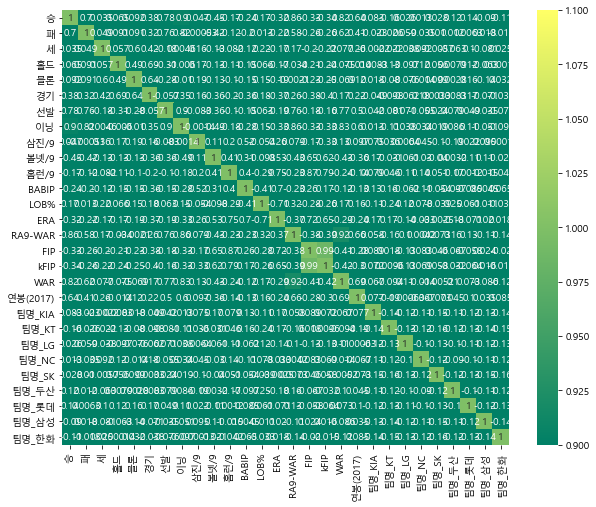

In [16]:
# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(x_train.corr(), annot=True, vmin=1, vmax=1, cmap='summer')
plt.show()

In [17]:
x_train.shape
x_train.shape[1]

28

In [18]:
baseball_df.values.shape

(152, 21)

In [19]:
# 분산 팽창요인 (VLF) - 다중공선성
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_train.values, i )  for i in range( x_train.shape[1] ) ]
vif['features'] = x_train.columns
vif 

,VIF Factor,features
0,8.577012,승
1,6.722411,패
2,4.032262,세
3,4.101391,홀드
4,3.283049,블론
5,14.540301,경기
6,53.366758,선발
7,75.977394,이닝
8,108.213660,삼진/9
9,47.095125,볼넷/9


In [25]:
# 팀명_한화 컬럼 제거
# x_train
x_remove = x_train.drop(['팀명_한화', 'FIP', 'kFIP', '이닝', 'BABIP', 'LOB%', 'RA9-WAR', '선발', '경기', 'ERA'], axis=1)
x_remove
# x_test
x_test_r = x_test.drop(['팀명_한화', 'FIP', 'kFIP', '이닝', 'BABIP', 'LOB%', 'RA9-WAR', '선발', '경기', 'ERA'], axis=1)
x_test_r

,승,패,세,홀드,블론,삼진/9,볼넷/9,홈런/9,WAR,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성
59,1,2,0,1,1,8.84,2.25,1.77,0.28,10500,0,0,0,0,0,0,0,1
33,8,7,0,2,0,7.03,3.33,1.44,1.09,18000,0,0,0,0,0,0,0,0
69,0,2,0,0,0,8.28,7.92,0.72,0.21,2700,0,0,0,0,0,0,0,1
127,1,1,0,0,0,3.71,5.82,1.06,-0.18,12500,0,0,0,0,0,1,0,0
31,7,8,0,0,0,7.30,4.70,1.09,1.23,3000,0,0,0,0,0,0,1,0
107,0,0,0,0,0,4.50,13.50,0.00,-0.04,2800,0,0,0,0,0,0,0,1
97,0,0,0,0,0,9.00,9.00,0.00,0.00,3200,0,0,0,0,0,1,0,0
14,8,4,0,3,0,8.40,3.22,0.98,2.25,10000,0,0,0,0,0,0,0,1
53,2,4,2,5,0,8.26,4.03,1.01,0.44,4500,0,0,0,0,1,0,0,0
44,3,6,7,5,3,6.93,1.78,0.71,0.68,60000,0,0,1,0,0,0,0,0


In [26]:
# 다중공선성이 높은 컬럼을 제거후 다시 다중공선성 출력
vif = pd.DataFrame()
vif['VIF Factor']= [ variance_inflation_factor(x_remove.values, i )  for i in range( x_remove.shape[1] ) ]
vif['features'] = x_remove.columns
vif

,VIF Factor,features
0,8.785904,승
1,4.443085,패
2,2.360514,세
3,2.327691,홀드
4,3.720477,블론
5,7.461101,삼진/9
6,5.989261,볼넷/9
7,3.633360,홈런/9
8,6.291328,WAR
9,3.474591,연봉(2017)


In [22]:
vif['VIF Factor'].nlargest(1).index

Int64Index([0], dtype='int64')

In [27]:
# SGDRegress  모델의 r2 점수(train, test )를 출력
model=Pipeline([('scl',StandardScaler()), ('clf',SGDRegressor())])
model.fit(x_remove, y_train)

Pipeline(steps=[('scl', StandardScaler()), ('clf', SGDRegressor())])

In [28]:
print(model.score(x_remove, y_train))
print(model.score(x_test_r, y_test))
# 여전히 과적합이 일어나는 것으로 보여짐..

0.9314357493402043
0.7612964790655848


3. Lasso 모델을 이용하여 r2 점수(train, test )를 출력하시요.

In [29]:
model_lasso = make_pipeline(StandardScaler(), Lasso())
model_lasso.fit(x_remove, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [30]:
print(model_lasso.score(x_remove, y_train))
print(model_lasso.score(x_test_r, y_test))

0.9317932155389275
0.7681995392951457


4. 팀별 연봉(2018) 평균

In [32]:
grouped = baseball_df['연봉(2018)'].groupby(baseball_df['팀명'])

In [33]:
grouped.mean()

팀명
KIA    29440.000000
KT     10184.210526
LG     23444.444444
NC     11353.846154
SK     17255.555556
두산     17980.000000
롯데     26707.142857
삼성     14220.000000
한화     21720.000000
Name: 연봉(2018), dtype: float64

5. 연봉(2017) 에서 연봉(2018)로 가장 많이 인상된 선수 5명

In [36]:
baseball_df['연봉상승률'] = baseball_df['연봉(2018)'] / baseball_df['연봉(2017)'] * 100

In [37]:
baseball_df

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
0,SK,16,7,0,0,0,30,30,190.0,8.95,...,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000,164.705882
1,LG,11,11,1,0,0,30,29,185.1,7.43,...,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000,240.000000
2,KIA,20,6,0,0,0,31,31,193.1,7.36,...,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000,153.333333
3,LG,10,7,0,0,0,28,28,175.2,8.04,...,0.298,75.0,3.43,6.11,4.20,4.03,4.63,100000,100000,100.000000
4,롯데,13,7,0,0,0,30,30,187.1,7.49,...,0.323,74.1,3.80,6.13,4.36,4.31,4.38,111000,85000,130.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,한화,2,5,0,0,2,33,5,62.2,4.31,...,0.355,56.9,7.76,-1.21,6.21,6.48,-0.47,7100,8100,87.654321
148,KIA,3,2,0,0,0,25,11,59.1,4.85,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,241.935484
149,롯데,0,2,0,0,0,9,2,14.2,4.91,...,0.382,52.8,11.66,-0.83,8.03,8.29,-0.61,10000,16000,62.500000
150,삼성,0,3,0,1,0,41,0,43.2,7.63,...,0.341,73.9,5.77,-0.40,6.87,6.95,-0.70,4000,2900,137.931034


In [39]:
baseball_df.sort_values('연봉상승률', ascending=False).head()

,팀명,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,...,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017),연봉상승률
12,KIA,8,6,0,0,0,23,19,118.1,5.55,...,0.331,72.3,3.65,4.25,4.07,4.19,2.79,13000,3100,419.354839
133,KIA,7,4,11,6,6,65,1,80.1,7.39,...,0.267,75.0,4.59,1.89,5.54,5.53,-0.20,15000,4700,319.148936
13,롯데,12,6,0,0,0,28,28,171.1,6.15,...,0.290,78.3,3.68,5.92,5.07,5.14,2.54,25000,10000,250.000000
5,KT,8,10,0,0,0,26,26,160.0,7.42,...,0.289,76.1,3.04,6.52,4.42,4.32,3.94,85000,35000,242.857143
148,KIA,3,2,0,0,0,25,11,59.1,4.85,...,0.263,65.4,5.92,0.39,6.41,6.77,-0.49,7500,3100,241.935484


In [41]:
# 6. 팀별 승,패 수
grouped = baseball_df[['승', '패']].groupby(baseball_df['팀명'])

In [42]:
grouped.sum()

,승,패
팀명,,
KIA,62,44
KT,41,65
LG,63,68
NC,38,32
SK,65,61
두산,60,37
롯데,68,48
삼성,44,58
한화,45,67
